# Unit 3: Lesson 1: Project 4 Challenge: Linear Regression vs KNN Regression: 2013 and 2014 New York Crime Data

## Objective: Validate Regression Model For Prediction and compare to KNN Regression Model

Validate a linear regression model to predict property crimes using New York crime data from 2013 as a training set and 2014 as a test set. Test KNN model vs. linear regression model for accuracy

Data sources:
https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls

https://ucr.fbi.gov/crime-in-the-u.s/2014/crime-in-the-u.s.-2014/tables/table-8/table-8-by-state/Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.xls

Eva Rubin

November 2018

In [116]:
import numpy as np
import pandas as pd

import math
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# scipy: import cross validation and KFold
import scipy
from scipy import stats
from scipy.stats import boxcox

# sklearn: import cross validation and KFold
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import neighbors

# matplotlib and sns plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Help
# https://pythonfordatascience.org/linear-regression-python/

In [50]:
#plt.rcParams['figure.figsize'] = (50.0, 20.0)
#plt.rcParams.update({'font.size': 22})

In [51]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv"
            )
df_orig = pd.read_csv(data_path, delimiter= ',', header=None)

In [52]:
data_path_2014 = ("/Users/evarubin/Dev/thinkful/data/01-bootcamp-data/unit2/unit2-lesson5-offenses_known_to_law_enforcement_by_new_york_by_city_2014.csv"
                 )
df_orig_2014 = pd.read_csv(data_path_2014, delimiter= ',', header=None)
                  

In [53]:
# Look at structure of df_orig_2014
df_orig.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Table 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
5,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
6,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
7,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
8,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
9,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [54]:
# Get column names
# Look at structure of df_orig_2014
df_orig_2014.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Table 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"by City, 2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
5,Adams Village,"1,851",0,0,NaN,0,0,0,11,1,10,0,0
6,Addison Town and Village,"2,568",2,0,NaN,0,1,1,49,1,47,1,0
7,Afton Village4,820,0,0,0,NaN,0,0,1,0,1,0,0
8,Akron Village,"2,842",1,0,NaN,0,0,1,17,0,17,0,0
9,Albany4,"98,595",802,8,54,NaN,237,503,"3,888",683,"3,083",122,12


In [55]:
# Rename columns
df_orig.rename(columns={0: 'city', 1: 'pop_size', 2: 'violent_crime', 3: 'murder_manslaughter',
       4: 'rape_1', 5: 'rape_2', 6: 'robbery', 7: 'aggravated_assault', 8: 'property_crime', 
       9: 'burglary', 10: 'larceny_theft', 11: 'mv_theft', 12: 'arson_3'}, inplace=True)

df_orig.columns


Index(['city', 'pop_size', 'violent_crime', 'murder_manslaughter', 'rape_1',
       'rape_2', 'robbery', 'aggravated_assault', 'property_crime', 'burglary',
       'larceny_theft', 'mv_theft', 'arson_3'],
      dtype='object')

In [56]:
# Rename columns
df_orig_2014.rename(columns={0: 'city', 1: 'pop_size', 2: 'violent_crime', 3: 'murder_manslaughter',
       4: 'rape_1', 5: 'rape_2', 6: 'robbery', 7: 'aggravated_assault', 8: 'property_crime', 
       9: 'burglary', 10: 'larceny_theft', 11: 'mv_theft', 12: 'arson_3'}, inplace=True)

df_orig_2014.columns

Index(['city', 'pop_size', 'violent_crime', 'murder_manslaughter', 'rape_1',
       'rape_2', 'robbery', 'aggravated_assault', 'property_crime', 'burglary',
       'larceny_theft', 'mv_theft', 'arson_3'],
      dtype='object')

In [57]:
df_orig.head()

,city,pop_size,violent_crime,murder_manslaughter,rape_1,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,mv_theft,arson_3
0,Table 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3


In [58]:
# Check for samples with null records for property crime since it is dependent variable
df_orig.loc[df_orig['property_crime'] == '0']

,city,pop_size,violent_crime,murder_manslaughter,rape_1,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,mv_theft,arson_3
191,Manchester Village,"1,688",0,0,NaN,0,0,0,0,0,0,0,0
213,New Berlin Town,"1,622",0,0,NaN,0,0,0,0,0,0,0,0
261,Port Byron Village,"1,274",0,0,NaN,0,0,0,0,0,0,0,0
292,Schoharie Village,872,0,0,NaN,0,0,0,0,0,0,0,0
300,Shortsville Village,"1,437",0,0,NaN,0,0,0,0,0,0,0,0
324,Tuxedo Park Village,615,0,0,NaN,0,0,0,0,0,0,0,0


In [59]:
# Drop above samples from data set since all categories are 0 and they represent a small sample
# possible missing reports or just no crimes whatsoever in small towns?

df_orig = df_orig[df_orig['property_crime'] > '0']
df_orig_2014 = df_orig_2014[df_orig_2014['property_crime'] > '0']


In [60]:
df_orig.head()

,city,pop_size,violent_crime,murder_manslaughter,rape_1,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,mv_theft,arson_3
4,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
5,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
6,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
7,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
8,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN


In [63]:
# create new df copy and Remove correct rape_1 column and remove first 5 unwanted rows and last 3 unwanted rows.
df = df_orig.drop('rape_1', axis=1).drop(df_orig.index[0:1]).drop(df_orig.index[-3:]).copy()
df_2014 = df_orig_2014.drop('rape_2', axis=1).drop(df_orig_2014.index[0:1]).drop(df_orig_2014.index[-3:]).copy()



In [64]:
# Rename column rape
df.rename(columns={'rape_2': 'rape'}, inplace=True)

df_2014.rename(columns={'rape_1': 'rape'}, inplace=True)

In [65]:
df_2014.head()


,city,pop_size,violent_crime,murder_manslaughter,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,mv_theft,arson_3
5,Adams Village,"1,851",0,0,NaN,0,0,11,1,10,0,0
6,Addison Town and Village,"2,568",2,0,NaN,1,1,49,1,47,1,0
7,Afton Village4,820,0,0,0,0,0,1,0,1,0,0
8,Akron Village,"2,842",1,0,NaN,0,1,17,0,17,0,0
9,Albany4,"98,595",802,8,54,237,503,"3,888",683,"3,083",122,12


In [66]:

# Fix rape definition issues: converting from legacy definition (rape_2) to revised definition (rape_1)
# so missing values in one column are reported as 0 in other column depending on which definition was used by that city

df['rape'].fillna(0, inplace=True)
df_2014['rape'].fillna(0, inplace=True)


In [67]:
# Clean up features

# Remove commas in pop size numbers
df['pop_size'] = df['pop_size'].str.replace(',', '')

# Remove commas in numbers
df['property_crime'] = df['property_crime'].str.replace(',', '')

# Remove commas in numbers
df['robbery'] = df['robbery'].str.replace(',', '')

# Remove commas in numbers
df['violent_crime'] = df['violent_crime'].str.replace(',', '')

# Remove commas in numbers
df['rape'] = df['rape'].str.replace(',', '')

# Remove commas in numbers
df['aggravated_assault'] = df['aggravated_assault'].str.replace(',', '')

# Remove commas in numbers
df['burglary'] = df['burglary'].str.replace(',', '')

# Remove commas in numbers
df['larceny_theft'] = df['larceny_theft'].str.replace(',', '')

# Remove commas in numbers
df['mv_theft'] = df['mv_theft'].str.replace(',', '')


In [68]:
# Clean up features

# Remove commas in pop size numbers
df_2014['pop_size'] = df_2014['pop_size'].str.replace(',', '')

# Remove commas in numbers
df_2014['property_crime'] = df_2014['property_crime'].str.replace(',', '')

# Remove commas in numbers
df_2014['robbery'] = df_2014['robbery'].str.replace(',', '')

# Remove commas in numbers
df_2014['violent_crime'] = df_2014['violent_crime'].str.replace(',', '')

# Remove commas in numbers
df_2014['rape'] = df_2014['rape'].str.replace(',', '')

# Remove commas in numbers
df_2014['aggravated_assault'] = df_2014['aggravated_assault'].str.replace(',', '')

# Remove commas in numbers
df_2014['burglary'] = df_2014['burglary'].str.replace(',', '')

# Remove commas in numbers
df_2014['larceny_theft'] = df_2014['larceny_theft'].str.replace(',', '')

# Remove commas in numbers
df_2014['mv_theft'] = df_2014['mv_theft'].str.replace(',', '')

In [69]:
# Convert type to int (from string)

df['pop_size'] = df['pop_size'].astype(int)

df['property_crime'] = df['property_crime'].astype(int)

df['robbery'] = df['robbery'].astype(int)

df['violent_crime'] = df['violent_crime'].astype(int)

df['murder_manslaughter'] = df['murder_manslaughter'].astype(int)

df['rape'] = df['rape'].astype(int)

df['aggravated_assault'] = df['aggravated_assault'].astype(int)

df['burglary'] = df['burglary'].astype(int)

df['larceny_theft'] = df['larceny_theft'].astype(int)

df['mv_theft'] = df['mv_theft'].astype(int)

df['arson_3'] = df['mv_theft'].astype(int)


# Convert to str
df['city'] = df['city'].astype(str)


In [70]:
df_2014.isna().sum()

city                     0
pop_size                 0
violent_crime            0
murder_manslaughter      0
rape                   137
robbery                  0
aggravated_assault       0
property_crime           0
burglary                 0
larceny_theft            0
mv_theft                 0
arson_3                  4
dtype: int64

In [71]:
# Convert type to int (from string)

df_2014['pop_size'] = df_2014['pop_size'].astype(int)

df_2014['property_crime'] = df_2014['property_crime'].astype(int)

df_2014['robbery'] = df_2014['robbery'].astype(int)

df_2014['violent_crime'] = df_2014['violent_crime'].astype(int)

df_2014['murder_manslaughter'] = df_2014['murder_manslaughter'].astype(int)

#df_2014['rape'] = df_2014['rape'].astype(int)

df_2014['aggravated_assault'] = df_2014['aggravated_assault'].astype(int)

df_2014['burglary'] = df_2014['burglary'].astype(int)

df_2014['larceny_theft'] = df_2014['larceny_theft'].astype(int)

df_2014['mv_theft'] = df_2014['mv_theft'].astype(int)

df_2014['arson_3'] = df_2014['mv_theft'].astype(int)


# Convert to str
df_2014['city'] = df_2014['city'].astype(str)

In [72]:
# Convert new features to catgorical: murder, robbery for possible later use

df['murder_manslaughter_cat'] = np.where(df['murder_manslaughter'] == 0, 0, 1)

df['robbery_cat'] = np.where(df['robbery'] == 0, 0, 1)


In [73]:
df.dtypes

city                       object
pop_size                    int64
violent_crime               int64
murder_manslaughter         int64
rape                        int64
robbery                     int64
aggravated_assault          int64
property_crime              int64
burglary                    int64
larceny_theft               int64
mv_theft                    int64
arson_3                     int64
murder_manslaughter_cat     int64
robbery_cat                 int64
dtype: object

In [74]:
df.head()

,city,pop_size,violent_crime,murder_manslaughter,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,mv_theft,arson_3,murder_manslaughter_cat,robbery_cat
5,Adams Village,1861,0,0,0,0,0,12,2,10,0,0,0,0
6,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,1,0,0
7,Akron Village,2846,3,0,0,0,3,16,1,15,0,0,0,0
8,Albany,97956,791,8,30,227,526,4090,705,3243,142,142,1,1
9,Albion Village,6388,23,0,3,4,16,223,53,165,5,5,0,1


### Ordinary Least Squares

#### Property Crime is a category of crime that subsumes burglary, larceny, and mv, so they are not included in OLS.  Will include population size and broad category of violent crime that subsumes murder/manslaughter, rape, robbery, and aggravated assault to get.

#### R-squared is very high at .999, so will need to determine which features can be removed from regression, and which features predict property crime.

#### Will check linearity of dependent to independent variables, multi-variate distribution (error from model is distributed normally), homoscedasticity, and multicolinearity and then re-run OLS.


In [75]:
#Ordinary Least Squares using statmodels formula (smf)

# requires import statsmodels.formula.api as smf

lm_1 = smf.ols(formula = "property_crime ~ pop_size + murder_manslaughter + rape + aggravated_assault + robbery", data = df).fit()
lm_1.summary()

# R-squared - describes how much of dependent variable outcome is explaind by independent variables

# Coef - dependent variable would already be at this level without other variables added.
# Where "0" starts. Don't give it that much weight.

# Coef can represent a lot of bias. Negative coefficients - if there's a safer relationship
# (in this case less property crime) - it shows relativity.

# Coef and y intercept: coef is in the unit that's represented in the data (cm, or %, or feet, etc).

# When each additional unit of population size occurs, property crime goes up by 0.0131
# When each additional unit of murder manslaughter occurs, property crime goes up by 42.0490
# When each additional unit of rape_2 occurs, property crime goes up by 64.6682
# When each additional unit of aggravated_assault occurs, property crime goes down by -3.4565
# When each additional unit of robbery occurs, property crime goes down by 2.9138

# pay attention to confidence intervals - you can predict that the property crime is going to be affected
# as coef's tell you with the confidence level noted in p-value


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         property_crime   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.055e+04
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:20:44   Log-Likelihood:                -2336.1
No. Observations:                 339   AIC:                             4684.
Df Residuals:                     333   BIC:                             4707.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              33.8914     16.194      2.093      0.037       2.036      65.747
pop_size                0.0125      0.001     14.557      0.000       0.011       0.014
murder_manslaughter    67.7309     15.485      4.374      0.000      37.270      98.192
rape                   63.0219      4.234     14.883      0.000      54.692      71.351
aggravated_assault     -1.7183      0.599     -2.868      0.004      -2.897      -0.540
robbery                -0.0391      1.017     -0.038      0.969      -2.040       1.961
==============================================================================
Omnibus:                      237.213   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4798.189
Skew:                           2.589   Prob(JB):                         0.00
Kurtosis:                      20.688   Cond. No.                     5.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Check Linearity and Data Distributions: Pair plot

#### Property Crime is a category of crime that subsumes burglary, larceny, and mv, so they are not included in linearity check.  Will check linearity with population size and broad category of violent crime that subsumes murder/manslaughter, rape, robbery, and aggravated assault.

#### There appears to be a linear relationship between violent crime and property crime, and between property crime and population size.

#### However, confidence in relationship between property crime and population size seems poorer than between property crime and violent crime.

#### New York outlier is potentially problematic.

#### Data distributions are not normal


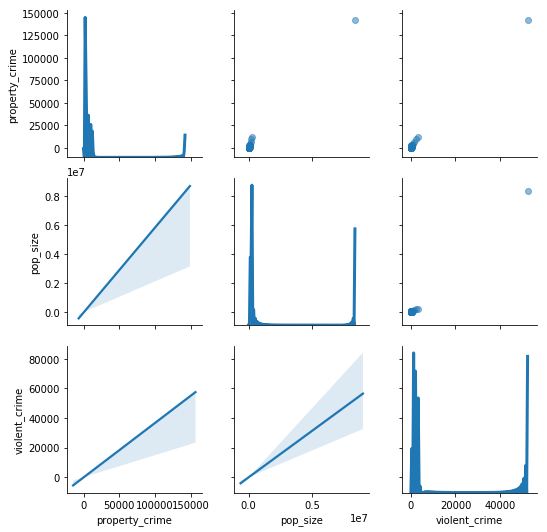

In [77]:
#sns.pairplot(df[['property_crime', 'pop_size', 'violent_crime']].dropna(how = 'any', axis = 0))

# Make a scatterplot Matrix.
g = sns.PairGrid(df[['property_crime', 'pop_size', 'violent_crime']].dropna(how = 'any', axis = 0), diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()


In [84]:
# Do a log transform to normalize population size and create new feature called log_pop_size
i_pop_size = 'pop_size'

# Remove any zeros (otherwise we get (-inf)
df.loc[df['pop_size'] == 0, 'pop_size'] = np.nan

# Remove any zeros (otherwise we get (-inf)
df_2014.loc[df_2014['pop_size'] == 0, 'pop_size'] = np.nan

# Drop NA
df.dropna(inplace=True)

# Drop NA
df_2014.dropna(inplace=True)

# Log Transform
df['log_' + i_pop_size] = np.log(df[i_pop_size])

# Log Transform
df_2014['log_' + i_pop_size] = np.log(df_2014[i_pop_size])

In [85]:

# Convert back to int (in cell above it gets converted to float)
df['pop_size'] = df['pop_size'].astype(int)

# Convert back to int (in cell above it gets converted to float)
df_2014['pop_size'] = df_2014['pop_size'].astype(int)

In [86]:
# Get quartiles and interquartile range in log transformed population size
q75, q25 = np.percentile(df['log_pop_size'].dropna(), [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

# Get quartiles and interquartile range in log transformed population size
q75_2014, q25_2014 = np.percentile(df_2014['log_pop_size'].dropna(), [75 ,25])
iqr_2014 = q75_2014 - q25_2014
 
min_2014 = q25_2014 - (iqr_2014*1.5)
max_2014 = q75_2014 + (iqr_2014*1.5)

In [89]:
# 2013: Define outlier in log transformed pop_size and create new variable called outlier

i_pop_size_log = 'log_pop_size'

df['outlier'] = 0

# Convert to float to avoid data type conversion warnings
df['outlier'] = df['outlier'].astype(int)
 
df.loc[df[i_pop_size_log] < min, 'outlier'] = 1
df.loc[df[i_pop_size_log] > max, 'outlier'] = 1

# 2014: Define outlier in log transformed pop_size and create new variable called outlier

df_2014['outlier'] = 0

# Convert to float to avoid data type conversion warnings
df_2014['outlier'] = df_2014['outlier'].astype(int)
 
df_2014.loc[df_2014[i_pop_size_log] < min, 'outlier'] = 1
df_2014.loc[df_2014[i_pop_size_log] > max, 'outlier'] = 1


In [91]:
# create new df without outlier New York and plot property crime against violent crime
df_outliers_removed = df[df['outlier'] != 1].copy()

# create new df without outlier New York and plot property crime against violent crime
df_outliers_removed_2014 = df_2014[df_2014['outlier'] != 1].copy()


## Recheck Linearity: Linearity of independent variables to dependent variable

#### This time linearity check includes all crimes subsumed by violent crime to look at linearity between property crime and murder/manslaughter, rape, aggravated assault, and robbery.

#### Population size appears to have strongest linear relationship independent variable with best confidence

#### After population size, independent variables aggravated assault, rape, and robbery appear to have strongest linear relationship with best confidence

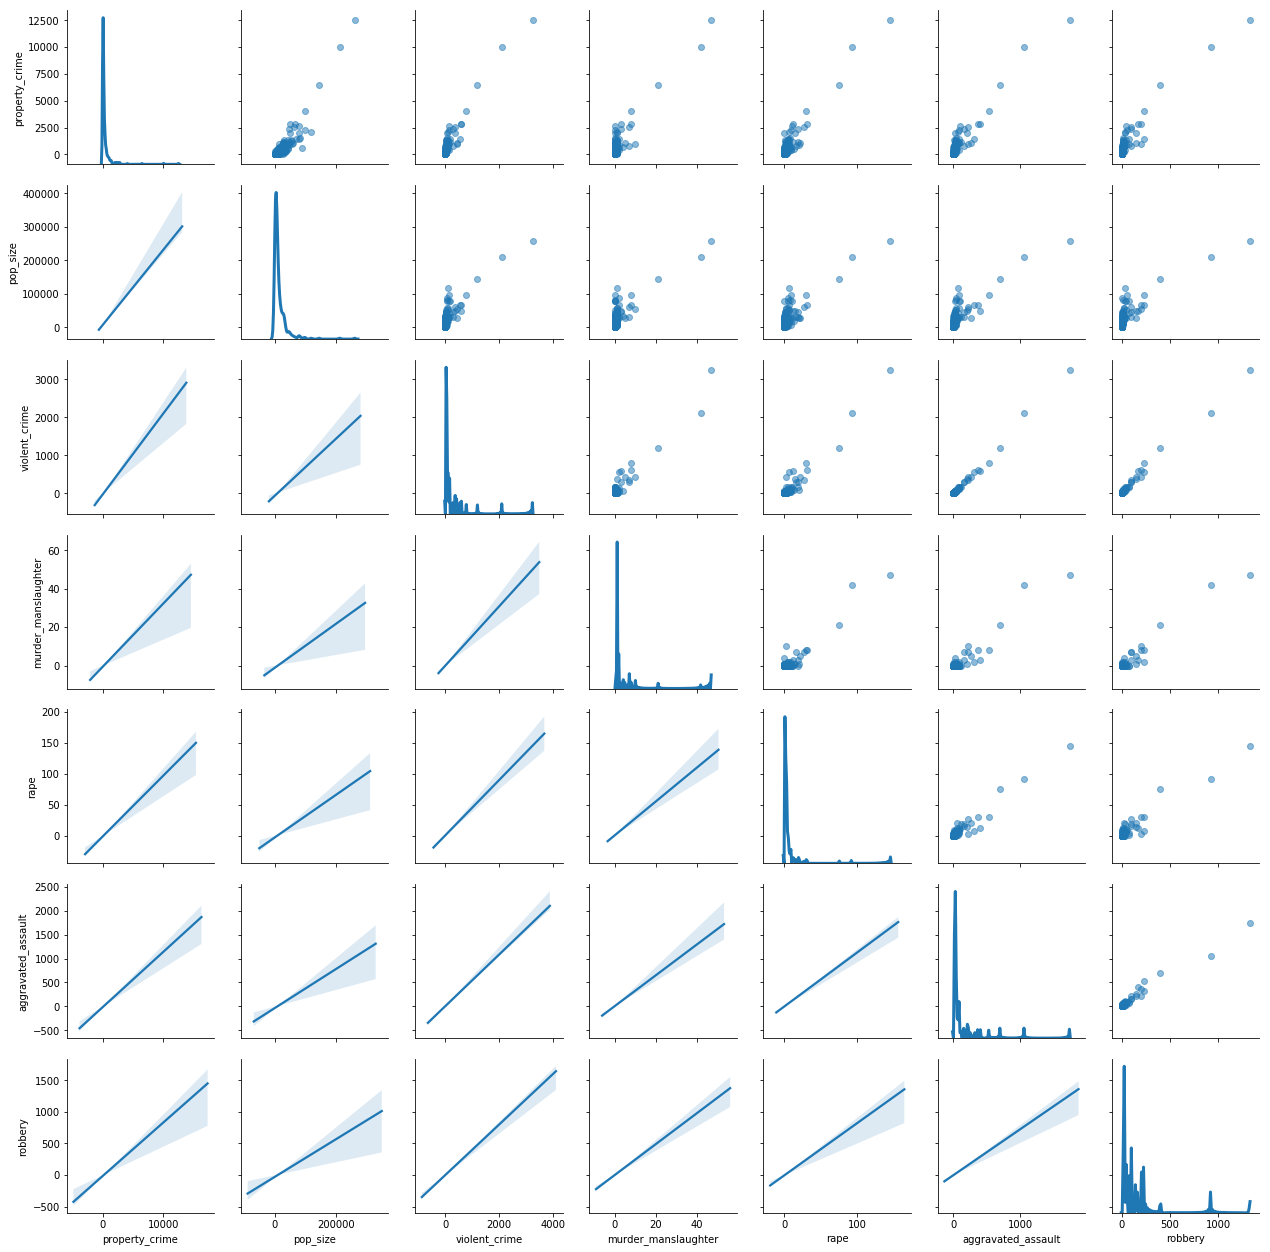

In [92]:
# Check out linearity between property crime and individual violent crimes now that new york outlier is removed
# Make a scatterplot Matrix.
g = sns.PairGrid(df_outliers_removed[['property_crime', 'pop_size', 'violent_crime', 'murder_manslaughter', 
                                'rape', 'aggravated_assault', 'robbery']].dropna(how = 'any', axis = 0), diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

### R-squared improved, but is still high at .965

### y intercept now negative after removing pop_size outliers, but since there are multiple independent variables having different effects and indication of strong multicolinearity in condition number, will do PCA to identify best components for analysis.

In [93]:
# requires import statsmodels.formula.api as smf

lm_2 = smf.ols(formula = "property_crime ~ pop_size + murder_manslaughter + aggravated_assault + rape + robbery", data = df_outliers_removed).fit()
lm_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         property_crime   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     1906.
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          4.93e-242
Time:                        12:29:42   Log-Likelihood:                -2254.4
No. Observations:                 338   AIC:                             4521.
Df Residuals:                     332   BIC:                             4544.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -20.6816     13.582     -1.523      0.129     -47.399       6.036
pop_size                0.0163      0.001     21.984      0.000       0.015       0.018
murder_manslaughter    13.4554     13.033      1.032      0.303     -12.182      39.093
aggravated_assault      2.1840      0.559      3.908      0.000       1.085       3.284
rape                   30.2236      4.158      7.268      0.000      22.043      38.404
robbery                 0.0751      0.815      0.092      0.927      -1.528       1.679
==============================================================================
Omnibus:                       64.944   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1001.841
Skew:                           0.082   Prob(JB):                    2.84e-218
Kurtosis:                      11.433   Cond. No.                     3.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Will Use PCA to identify which components explain most of variance.

### One component explains 80.48% of variance.  Will identify variables in that component and use for analysis.

In [94]:
# PCA: reduce dimensionality and prevent multi-colinearity - I may have picked the wrong variables, so this will help me
# identify the right variables to use (can't include categorical variables - axis=1 because it's a city

# have to drop city because it's not numerical, drop depedent/target variable: property_crime
# drop pop_size (keep log_pop_size)
# drop categorical variables: murder_manslaughter and robbery
# drop outliers

df_no_city = df_outliers_removed.drop(['city', 'property_crime', 'log_pop_size'], axis=1).dropna()

X = StandardScaler().fit_transform(df_no_city)
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA:\n',
    sklearn_pca.explained_variance_ratio_
)


The percentage of total variance in the dataset explained by each component from Sklearn PCA:
 [0.80557506 0.09982645 0.05549558 0.02196888 0.0060779 ]


In [95]:
# Eigenvalues and eigenvector - try to find the line that best fits the data
# by minimizing the distance between the line and the data points and maximizing the variance explained by the data
# the numbers associated with final points for this line for this component
Y_sklearn[:, 0]

array([-9.73522718e-01, -9.39003679e-01, -9.49928191e-01,  8.92826588e+00,
       -4.25558642e-01, -7.54915167e-01, -9.65185540e-01,  2.95200865e+00,
       -4.96064879e-01, -1.36205018e-01, -9.50067400e-01, -7.51218917e-01,
       -9.92801362e-01, -9.53916248e-01,  1.39959954e+00, -7.76942821e-01,
       -6.91767291e-01, -7.03287752e-01,  7.54941884e-02, -5.74434639e-01,
       -5.18770976e-01, -1.50293754e-01,  3.93876512e+00, -9.77716665e-01,
       -6.88613045e-01, -9.82469344e-01, -9.53918300e-01, -9.61009418e-01,
       -7.72372605e-01, -9.66765673e-01, -9.02370341e-01,  9.23659490e-01,
       -7.55024724e-03, -8.78583216e-01, -9.83599208e-01,  4.03899576e+01,
       -9.20195623e-01, -9.35535783e-01, -9.34071543e-01, -4.28339460e-01,
       -3.91887386e-01, -8.92085672e-01, -8.04903301e-01, -7.03446890e-01,
       -9.91636833e-01, -3.34107423e-01, -9.56331193e-01, -8.83566281e-01,
       -9.88339727e-01, -7.68825286e-01, -9.32803849e-01, -7.70842091e-01,
       -9.52486665e-01,  

### PCA Component:

#### Aggravated Assault and Robbery violent crimes appear to explain the greatest level of variance in the model


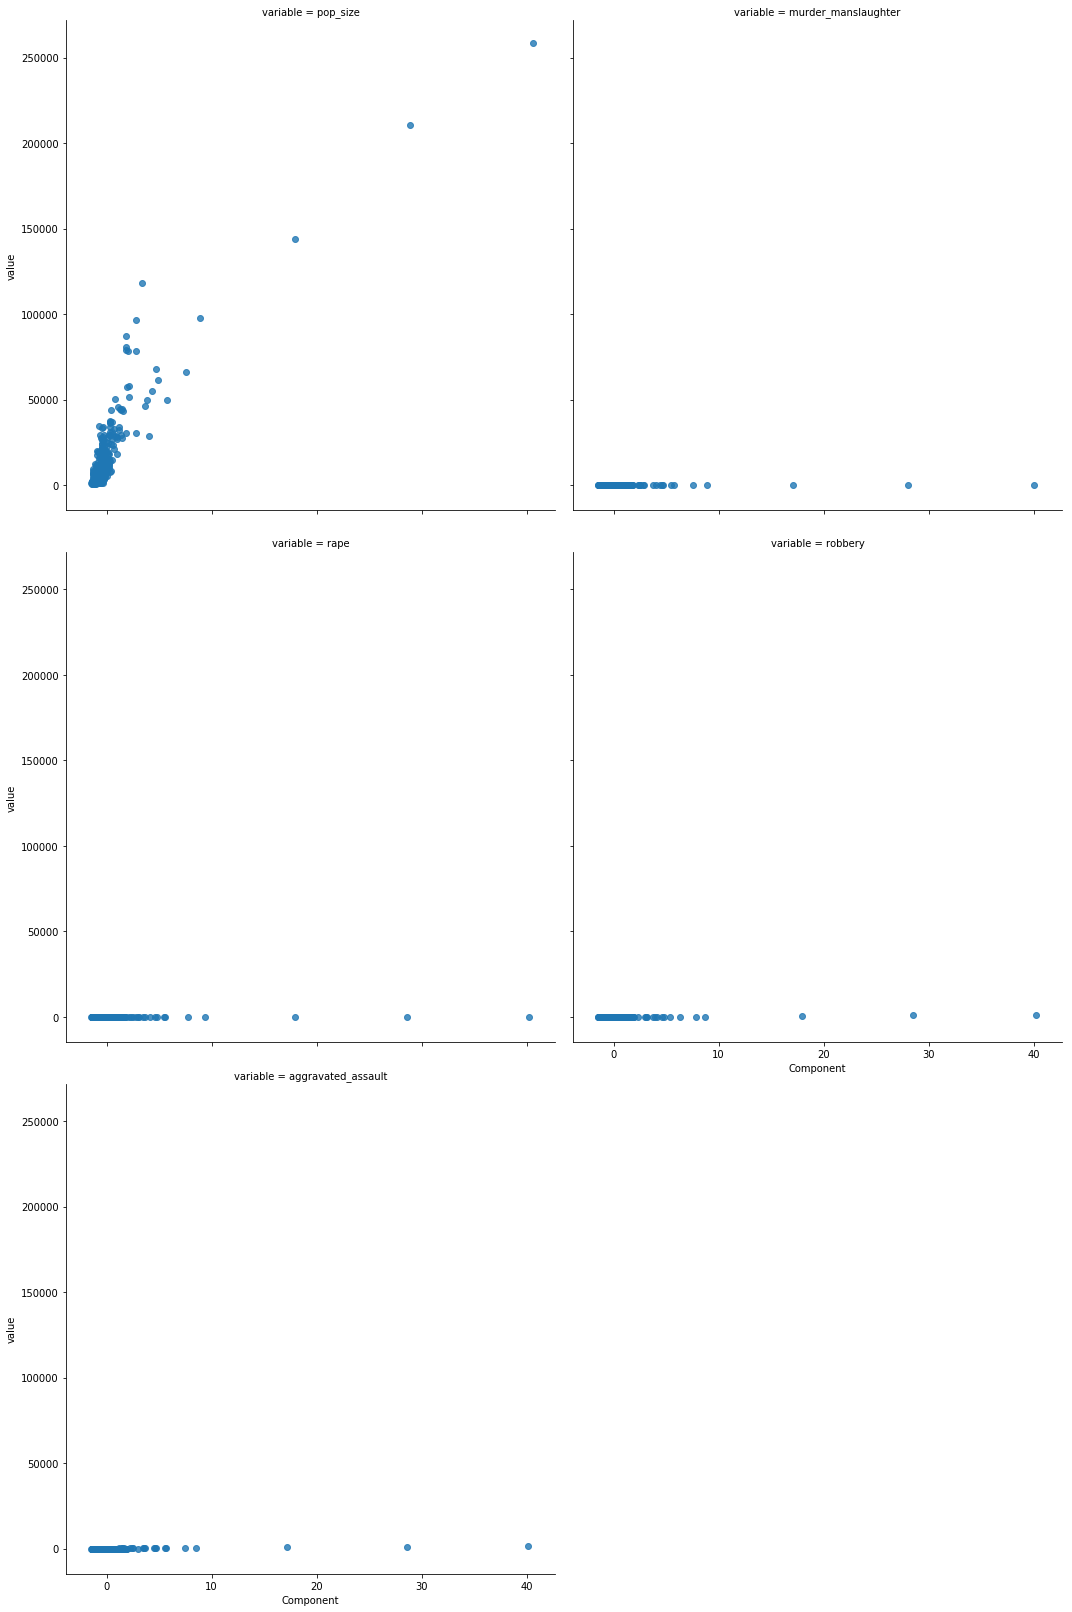

In [96]:
# DO OLS WITH most linear

# Identify what's in the components that's responsible for result:
# Remove first variable (property crime) because it is dependent
# Remove categorical variables, pop_size_squared, and arson_3 because types don't match

data_to_plot = df_no_city.drop(['violent_crime', 'murder_manslaughter_cat', 'robbery_cat', 
                                'burglary', 'larceny_theft', 'mv_theft',
                               'arson_3', 'outlier'], axis=1)
data_to_plot['Component'] = Y_sklearn[:,0]
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", col_wrap=2, height=7.5, aspect=1)
g = g.map(
  sns.regplot,
  "Component",
  "value",
  x_jitter=.49,
  y_jitter=.49,
  fit_reg=False
)


plt.show()


### Check Normality of Errors in Residual Plot
#### Dependent variable: property_crime
#### Independent variables: robbery, and aggravated_assault

In [97]:
# Extract predicted values.

# Reset x and y for regression since removed outlier and it changed shape of df after setting x and y:

# Instantiate the model.
lin_regr = linear_model.LinearRegression()

# Fit model to data.
y_residual = pd.DataFrame(df_outliers_removed['property_crime'])
x_residual = pd.DataFrame(df_outliers_removed[['aggravated_assault', 'robbery']])

lin_regr.fit(x_residual, y_residual)

# Extract predicted and actual values.
predicted = lin_regr.predict(x_residual).ravel()
actual = df_outliers_removed['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted


/Users/evarubin/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


### Residual Error Plot indicates multivariate normality is an issue.

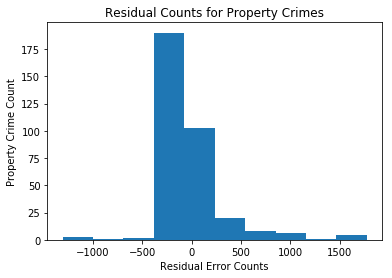

In [98]:
# Residual Error Plot
plt.hist(residual)
plt.title('Residual Counts for Property Crimes')
plt.xlabel('Residual Error Counts')
plt.ylabel('Property Crime Count')
plt.show()

### Regression

#### R-squared continues to be high even with reduced features. Overfit likely.
#### Condition number continues to be high, indicating continued likelihood of multicolinearity

In [99]:
lm_3 = smf.ols(formula = "property_crime ~ pop_size", data = df_outliers_removed).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         property_crime   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1807.
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          3.14e-137
Time:                        12:30:19   Log-Likelihood:                -2514.4
No. Observations:                 338   AIC:                             5033.
Df Residuals:                     336   BIC:                             5040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -199.7262     26.371     -7.574      0.000    -251.599    -147.854
pop_size       0.0376      0.001     42.506      0.000       0.036       0.039
==============================================================================
Omnibus:                       92.756   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3880.314
Skew:                           0.076   Prob(JB):                         0.00
Kurtosis:                      19.598   Cond. No.                     3.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Data is not linear as indicated by Error Residuals Probability Plot


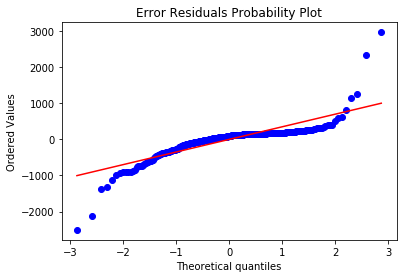

In [100]:
# Probability Plot to view normality (blue data should fit to red line of expected error)
stats.probplot(lm_3.resid, plot= plt)
plt.title("Error Residuals Probability Plot");

### Data is heteroscedastic as indicated by Residual Error Plot

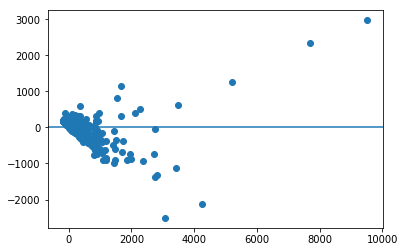

In [101]:
# Residual Error Plot
resid_3 = lm_3.resid
plt.axhline(y=0)
plt.scatter(lm_3.predict(), resid_3);

### Quanitify normality in Kolmogorov-Smirnov Test:

In [102]:
# KS test to quantify normality
# reject null hypothesis: residual error is drawn from "same population" as normally distributed population
#(theoretical norm in this case).  Error is not normally distributed.

print('Kolmogorov-Smirnov test:')
print(stats.kstest(lm_3.resid, 'norm'))

Kolmogorov-Smirnov test:
KstestResult(statistic=0.6414852600270953, pvalue=0.0)


In [103]:
# Fix non-normality
# https://stattrek.com/regression/linear-transformation.aspx?tutorial=ap

### Feature Engineering: Address normality of independent variable, robbery:

#### Log Transformation best fit and saved as new feature: log_robbery
#### Distribution remains skewed

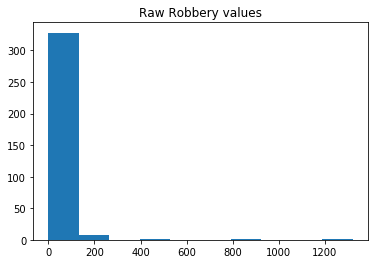

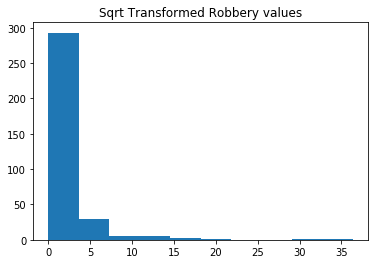

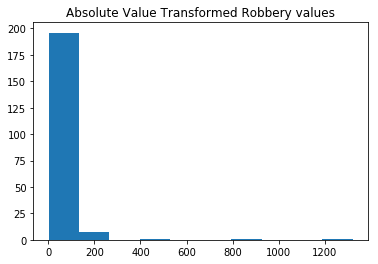

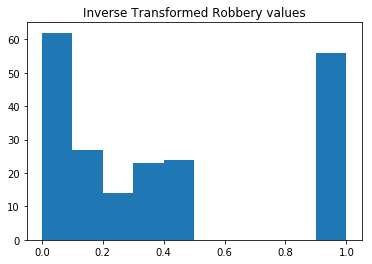

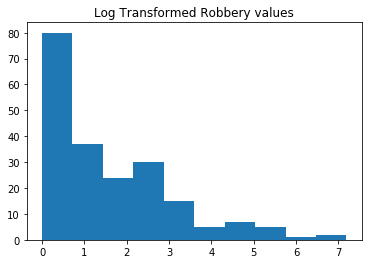

In [104]:
# Look at normality of distribution: robbery

# Sample data.
feature_robbery = df_outliers_removed['robbery']

# Plot the Raw Murder_Manslaughter Values.
plt.hist(feature_robbery)
plt.title('Raw Robbery values')
plt.show()

# Create a Square Root feature using a non-linear transformation.
sqrt_feature_robbery = [math.sqrt(x) for x in feature_robbery]

# SQRT Murder_Manslaughter feature
plt.hist(sqrt_feature_robbery)
plt.title('Sqrt Transformed Robbery values')
plt.show()

# Create an Absolute Value Feature
df_outliers_removed_abs = df_outliers_removed.loc[(df_outliers_removed['robbery'] > 0)]
feature_robbery_abs = df_outliers_removed_abs['robbery']

abs_feature_robbery = [abs(x) for x in feature_robbery_abs]

# Absolute Value Robbery feature
plt.hist(abs_feature_robbery)
plt.title('Absolute Value Transformed Robbery values')
plt.show()


# Create an Inverse Feature
df_outliers_removed_inverse = df_outliers_removed.loc[(df_outliers_removed['robbery'] > 0)]
feature_robbery_inverse = df_outliers_removed_inverse['robbery']

inverse_feature_robbery = [1/x for x in feature_robbery_inverse]


# Inverse Robbery feature
plt.hist(inverse_feature_robbery)
plt.title('Inverse Transformed Robbery values')
plt.show()


# Create a Log feature using a non-linear transformation.
df_outliers_removed_log = df_outliers_removed.loc[(df_outliers_removed['robbery'] > 0)]


outcome_property_crime_log_2 = df_outliers_removed_log['property_crime']
feature_robbery_log = df_outliers_removed_log['robbery']

log_feature_robbery = [math.log(x) for x in feature_robbery_log]

# Log Robbery feature
plt.hist(log_feature_robbery)
plt.title('Log Transformed Robbery values')
plt.show()

In [105]:
# Get W, P-value
# W: test statistic - closest to 100 is most normal
# P-value: < .05 = NOT normal distribution

print('Shapiro Test - Robbery:')
print('Log: ', stats.shapiro(log_feature_robbery))
print('Inverse: ', stats.shapiro(inverse_feature_robbery))
print('Square Root: ', stats.shapiro(sqrt_feature_robbery))
print('Absolute Value: ', stats.shapiro(abs_feature_robbery))

print()

Shapiro Test - Robbery:
Log:  (0.886927604675293, 2.5153816529677187e-11)
Inverse:  (0.8029208183288574, 2.0763318636044664e-15)
Square Root:  (0.5154072046279907, 2.1068009467753788e-29)
Absolute Value:  (0.21248257160186768, 1.1939815930997036e-28)



In [106]:
# Do a log transform to normalize robbery and create new feature called log_robbery

i_robbery = 'robbery'

# Remove any zeros (otherwise we get (-inf)
df_outliers_removed.loc[df_outliers_removed['robbery'] == 0, 'robbery'] = np.nan
 
# Drop NA
df_outliers_removed.dropna(inplace=True)
 
# Log Transform
df_outliers_removed['log_' + i_robbery] = np.log(df_outliers_removed[i_robbery])


### Feature Engineering: Address normality of independent variable, aggravated_assault:

#### Log Transformation best fit and saved as new feature: log_aggravated_assault
#### Distribution remains skewed

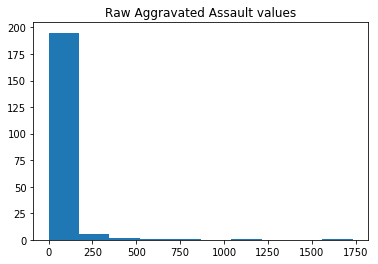

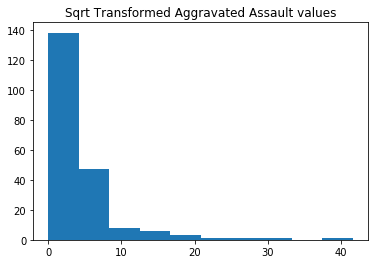

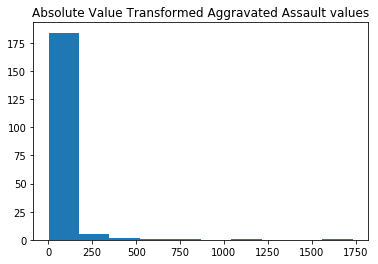

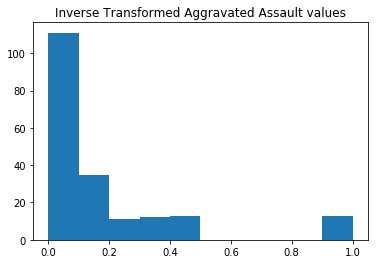

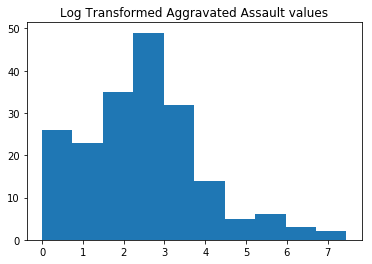

In [107]:
# Look at normality of distribution: relationship of independent variable property crime
# transformed to dependent variable aggravated_assault

# Sample data.
feature_aggravated_assault = df_outliers_removed['aggravated_assault']

# Plot the Raw Murder_Manslaughter Values.
plt.hist(feature_aggravated_assault)
plt.title('Raw Aggravated Assault values')
plt.show()

# Create a Square Root feature using a non-linear transformation.
sqrt_feature_aggravated_assault = [math.sqrt(x) for x in feature_aggravated_assault]

# SQRT aggravated_assault feature
plt.hist(sqrt_feature_aggravated_assault)
plt.title('Sqrt Transformed Aggravated Assault values')
plt.show()

# Create an Absolute Value Feature
df_outliers_removed_abs_aggravated_assault = df_outliers_removed.loc[(df_outliers_removed['aggravated_assault'] > 0)]
feature_aggravated_assault_abs = df_outliers_removed_abs_aggravated_assault['aggravated_assault']

abs_feature_aggravated_assault = [abs(x) for x in feature_aggravated_assault_abs]

# Absolute Value Robbery feature
plt.hist(abs_feature_aggravated_assault)
plt.title('Absolute Value Transformed Aggravated Assault values')
plt.show()


# Create an Inverse Feature
df_outliers_removed_inverse_aggravated_assault = df_outliers_removed.loc[(df_outliers_removed['aggravated_assault'] > 0)]
feature_aggravated_assault_inverse = df_outliers_removed_inverse_aggravated_assault['aggravated_assault']

inverse_feature_aggravated_assault = [1/x for x in feature_aggravated_assault_inverse]


# Inverse Robbery feature
plt.hist(inverse_feature_aggravated_assault)
plt.title('Inverse Transformed Aggravated Assault values')
plt.show()


# Create a Log feature using a non-linear transformation.
df_outliers_removed_log = df_outliers_removed.loc[(df_outliers_removed['aggravated_assault'] > 0)]


outcome_property_crime_log_3 = df_outliers_removed_log['property_crime']
feature_aggravated_assault_log = df_outliers_removed_log['aggravated_assault']

log_feature_aggravated_assault = [math.log(x) for x in feature_aggravated_assault_log]

# Log Robbery feature
plt.hist(log_feature_aggravated_assault)
plt.title('Log Transformed Aggravated Assault values')
plt.show()

In [108]:
# Get W, P-value
# W: test statistic - closest to 100 is most normal
# P-value: < .05 = NOT normal distribution

print('Shapiro Test - Aggravated Assault:')
print('Log: ', stats.shapiro(log_feature_aggravated_assault))
print('Inverse: ', stats.shapiro(inverse_feature_aggravated_assault))
print('Square Root: ', stats.shapiro(sqrt_feature_aggravated_assault))
print('Absolute Value: ', stats.shapiro(abs_feature_aggravated_assault))

print()

Shapiro Test - Aggravated Assault:
Log:  (0.9663732647895813, 0.00012841711577493697)
Inverse:  (0.6667236089706421, 2.2096969426557146e-19)
Square Root:  (0.6169329881668091, 3.246708945871209e-21)
Absolute Value:  (0.26946377754211426, 3.705856295248442e-27)



In [109]:
# Do a log transform to normalize aggravated_assault and create new feature called log_aggravated_assault

i_aggravated_assault = 'aggravated_assault'

# Remove any zeros (otherwise we get (-inf)
df_outliers_removed.loc[df_outliers_removed['aggravated_assault'] == 0, 'aggravated_assault'] = np.nan
 
# Drop NA
df_outliers_removed.dropna(inplace=True)
 
# Log Transform
df_outliers_removed['log_' + i_aggravated_assault] = np.log(df_outliers_removed[i_aggravated_assault])


### Ordinary Least Squares Linear Regression:


In [110]:
lm_4 = smf.ols(formula = "property_crime ~ robbery", data = df_outliers_removed).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         property_crime   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1535.
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           8.45e-94
Time:                        12:30:40   Log-Likelihood:                -1463.4
No. Observations:                 195   AIC:                             2931.
Df Residuals:                     193   BIC:                             2937.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    330.4724     32.564     10.148      0.000     266.246     394.699
robbery       10.1510      0.259     39.174      0.000       9.640      10.662
==============================================================================
Omnibus:                       79.855   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.702
Skew:                           1.558   Prob(JB):                     1.41e-75
Kurtosis:                       8.720   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Error Residuals Probability Plot shows continued poor fit between expected error and actual error after log transformation of robbery and aggravated_assault in feature engineering

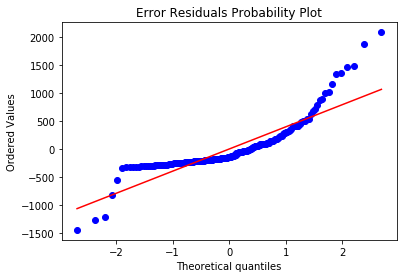

In [111]:
# Probability Plot to view normality (black data should fit to red line of expected error)
stats.probplot(lm_4.resid, plot= plt)
plt.title("Error Residuals Probability Plot");

### Residual Error Plot continues to show poor homoscedasticity after transformed dependent variable and identified best features (robbery and aggravated_assault) and transformed.

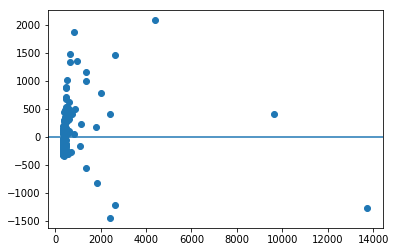

In [112]:
# Residual Error Plot
resid_4 = lm_4.resid
plt.axhline(y=0)
plt.scatter(lm_4.predict(), resid_4);

### Worsened statistic for KS test.  Error residual distribution continues to demonstrate poor fit against a normal distribution

In [113]:
# KS test to quantify normality
# reject null hypothesis: residual error is drawn from "same population" as normally distributed population
#(theoretical norm in this case).
# Error is not normally distributed, but much closer to normal than initial KS Test.
# Initial KstestResult(statistic=0.6391752534598999, pvalue=0.0)

print('Kolmogorov-Smirnov test:')
print(stats.kstest(lm_4.resid, 'norm'))

Kolmogorov-Smirnov test:
KstestResult(statistic=0.6410256410256411, pvalue=0.0)


In [114]:
# Check out multicolinearity in correlations between variables
# https://pythonprogramming.net/pandas-statistics-correlation-tables-how-to/
# df_outliers_removed[['log_pop_size', 'log_robbery', 'log_aggravated_assault']].corr()

corr = df_outliers_removed[['log_pop_size', 'log_robbery', 'log_aggravated_assault']].corr().stack()

corr = corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)]
corr

log_pop_size            log_robbery              0.769
                        log_aggravated_assault   0.754
log_robbery             log_pop_size             0.769
                        log_aggravated_assault   0.865
log_aggravated_assault  log_pop_size             0.754
                        log_robbery              0.865
dtype: float64

In [115]:
# 2013
df_regression_2013 = df_outliers_removed[['property_crime', 'pop_size']]

# Instantiate the model.
regr_2013 = linear_model.LinearRegression()

# Fit our model to our data.  Use pd.DataFrame() around the column you're looking to convert
# Otherwise, you get errors related to df vs. pandas series
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

y_regr_2013 = df_outliers_removed['property_crime'].values.reshape(-1, 1)
x_regr_2013 = df_outliers_removed[['robbery']]

regr_2013.fit(x_regr_2013, y_regr_2013)

# 2014 - CHANGE ALL TO 2014
df_regression_2014 = df_outliers_removed_2014[['property_crime', 'pop_size']]

# Instantiate the model.
regr_2014 = linear_model.LinearRegression()

# Fit our model to our data.  Use pd.DataFrame() around the column you're looking to convert
# Otherwise, you get errors related to df vs. pandas series
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

y_regr_2014 = df_outliers_removed_2014['property_crime'].values.reshape(-1, 1)
x_regr_2014 = df_outliers_removed_2014[['robbery']]

regr_2014.fit(x_regr_2014, y_regr_2014)

# Cross Validation

#2013
cross_val_scores_2013 = cross_val_score(regr_2013, x_regr_2013, y_regr_2013, cv=5)

# 2014
cross_val_scores_2014 = cross_val_score(regr_2014, x_regr_2014, y_regr_2014, cv=5)

print('2013 R-squared', regr_2013.score(x_regr_2013, y_regr_2013))
print('2014 R-squared (taking 2013 regression and applying to 2014 data)', regr_2013.score(x_regr_2014, y_regr_2014))
print()
print('2013 Cross Validation Scores: ', cross_val_scores_2013)
print('2014 Cross Validation Scores: ', cross_val_scores_2014)



2013 R-squared 0.8882843200707174
2014 R-squared (taking 2013 regression and applying to 2014 data) 0.8843867774719295

2013 Cross Validation Scores:  [0.88907493 0.1432642  0.14250246 0.95737375 0.80556245]
2014 Cross Validation Scores:  [0.85358502 0.37918041 0.39053251 0.90594313 0.87204735]


## Linear Regression Conclusion:

#### The linear regression model was not a good fit to predict 2013 New York property crime. This model is similarly poor in its ability to predict property crime in the 2014 New York Crime data.  Cross validation shows inconsistencies in both data sets.

#### When performing the original 2013 and 2014 R-squared, the scores are consistent.  However, when performing the cross validation scores, there are two random splits that perform inconsistently with the others, so additional training data might be useful iin producing consistent scores.

### KNN Regression


In [143]:

# 2013 Unweighted knn regression
knn_2013 = neighbors.KNeighborsRegressor(n_neighbors=5)

X_2013 = df_outliers_removed[['pop_size', 'robbery']]
Y_2013 = df_outliers_removed['property_crime']
knn_2013.fit(X_2013, Y_2013)

# 2013 Weighted knn regression
knn_w_2013 = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')

X_w_2013 = df_outliers_removed[['pop_size', 'robbery']]
Y_w_2013 = df_outliers_removed['property_crime']

knn_w_2013.fit(X_w_2013, Y_w_2013)

# 2014 Unweighted knn regression
knn_2014 = neighbors.KNeighborsRegressor(n_neighbors=5)

X_2014 = df_outliers_removed_2014[['pop_size', 'robbery']]
Y_2014 = df_outliers_removed_2014['property_crime']
knn_2014.fit(X_2014, Y_2014)

# 2014 Weighted knn regression
knn_w_2014 = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')

X_w_2014 = df_outliers_removed_2014[['pop_size', 'robbery']]
Y_w_2014 = df_outliers_removed_2014['property_crime']

knn_w_2014.fit(X_w_2014, Y_w_2014)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='distance')

1 :  [1.0]
2 :  [1.0, 0.9494716903409063]
3 :  [1.0, 0.9494716903409063, 0.9227643104099845]
4 :  [1.0, 0.9494716903409063, 0.9227643104099845, 0.8449074554097525]
5 :  [1.0, 0.9494716903409063, 0.9227643104099845, 0.8449074554097525, 0.7996303454605115]
6 :  [1.0, 0.9494716903409063, 0.9227643104099845, 0.8449074554097525, 0.7996303454605115, 0.7475284331921395]
7 :  [1.0, 0.9494716903409063, 0.9227643104099845, 0.8449074554097525, 0.7996303454605115, 0.7475284331921395, 0.6871093936314229]


Text(0.5,0,'K')

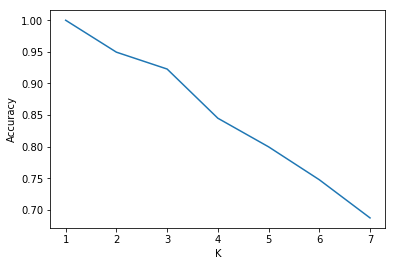

In [144]:
# Determine best k for KNN

scores = []

X_2 = df_outliers_removed[['pop_size', 'robbery']]
Y_2 = df_outliers_removed['property_crime']

for i in range(1, 8):
    knn_w_2 = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn_w_2.fit(X_2, Y_2)
    scores.append(knn_w_2.score(X_2, Y_2))
    print(i, ': ', scores)

plt.plot(range(1,8), scores)
plt.ylabel("Accuracy")
plt.xlabel("K")

In [149]:
# 2013 Unweighted KNN regression
score_2013 = cross_val_score(knn_2013, X_2013, Y_2013, cv=5)

# 2013 Weighted KNN regression
score_w_2013 = cross_val_score(knn_w_2013, X_w_2013, Y_w_2013, cv=5)

# 2014 Unweighted KNN regression
score_2014 = cross_val_score(knn_2014, X_2014, Y_2014, cv=5)

# 2014 Weighted KNN regression
score_w_2014 = cross_val_score(knn_w_2014, X_w_2014, Y_w_2014, cv=5)

print('2013 KNN Regression: ')
print("2013 Unweighted KNN Accuracy: %0.2f (+/- %0.2f)" % (score_2013.mean(), score.std() * 2))
print("2013 Weighted KNN Accuracy: %0.2f (+/- %0.2f)" % (score_w_2013.mean(), score_w.std() * 2))
print()

print('2014 KNN Regression: ')
print("2014 Unweighted KNN Accuracy: %0.2f (+/- %0.2f)" % (score_2014.mean(), score.std() * 2))
print("2014 Weighted KNN Accuracy: %0.2f (+/- %0.2f)" % (score_w_2014.mean(), score_w.std() * 2))

2013 KNN Regression: 
2013 Unweighted KNN Accuracy: 0.58 (+/- 0.14)
2013 Weighted KNN Accuracy: 0.62 (+/- 0.09)

2014 KNN Regression: 
2014 Unweighted KNN Accuracy: 0.63 (+/- 0.14)
2014 Weighted KNN Accuracy: 0.69 (+/- 0.09)


In [150]:
print('Linear Regression:')
print("2013 Linear Regression Accuracy: %0.2f (+/- %0.2f)" % (cross_val_scores_2013.mean(), cross_val_scores_2013.std() * 2))
print("2014 Linear Regression Accuracy: %0.2f (+/- %0.2f)" % (cross_val_scores_2014.mean(), cross_val_scores_2014.std() * 2))


Linear Regression:
2013 Linear Regression Accuracy: 0.59 (+/- 0.73)
2014 Linear Regression Accuracy: 0.68 (+/- 0.48)


## Conclusion: KNN vs. Linear Regression models for this data: KNN (as evaluated by cross validation scores)

- Neither KNN or Linear Regressions perform well on the data.
- KNN regressions performed better when weighted.
- KNN regressions performed better than linear regressions on 2013 data
- KNN regression performed slightly better than linear regression on 2014. However, margin of error much better for weighted KNN regression vs linear regression